In this analysis, I explored bike sales data of a Kenyan Bike selling company for the first six months of 2021. This addresses various questions like what is happening with the sales, what is the trend, what is the distribution, what is the repayment and how is each bike make, model and branch doing on various metrics.

I have compiled a short presentation to summarize the findings. Please find the  [link](https://docs.google.com/presentation/d/1-9-q2beNLUhm18SABTiaoXp1pXfpSRWyrMgNpAVzf54/edit#slide=id.g2f0504514fa_0_38)


In [1]:
#Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive


In [2]:
#Mount drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# import data
data = pd.read_excel('/content/drive/MyDrive/Gogo Data/gogo_sales_data.xlsx')

#Convert data to dataframe

data =pd.DataFrame(data)

In [4]:
data.head(5)

,make,model,branch,date_of_sale,is_late_to_pay,payment_expected,payment_actual
0,Boxer,BM 150,Nairobi,2021-01-06,0,95394,95394
1,TVS,HLX 100CC ES PLUS,Bungoma,2021-04-22,0,102784,102784
2,TVS,HLX 100CC KS,Bungoma,2021-02-26,0,82295,82295
3,TVS,HLX 150CC (5 Gears),Nairobi,2021-03-26,0,93586,93586
4,TVS,HLX 150X (5 Gears),Mombasa,2021-06-05,0,135065,135065


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   make              2000 non-null   object        
 1   model             2000 non-null   object        
 2   branch            2000 non-null   object        
 3   date_of_sale      2000 non-null   datetime64[ns]
 4   is_late_to_pay    2000 non-null   int64         
 5   payment_expected  2000 non-null   int64         
 6   payment_actual    2000 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 109.5+ KB


In [6]:
data.describe()

,date_of_sale,is_late_to_pay,payment_expected,payment_actual
count,2000,2000.000000,2000.000000,2000.000000
mean,2021-03-30 17:11:45.599999744,0.111000,100731.353000,91196.814500
min,2021-01-04 00:00:00,0.000000,800.000000,800.000000
25%,2021-02-12 00:00:00,0.000000,86480.000000,79171.250000
50%,2021-04-08 12:00:00,0.000000,102062.500000,96972.500000
75%,2021-05-10 00:00:00,0.000000,114751.250000,111471.250000
max,2021-06-30 00:00:00,1.000000,300050.000000,300050.000000
std,NaN,0.314211,22531.377948,31563.563804


In [7]:
#Add Month of sale

data['date_of_sale'] = pd.to_datetime(data['date_of_sale'])

data['Month_of_sale'] = data['date_of_sale'].dt.strftime('%B %Y')

data.head(5)

,make,model,branch,date_of_sale,is_late_to_pay,payment_expected,payment_actual,Month_of_sale
0,Boxer,BM 150,Nairobi,2021-01-06,0,95394,95394,January 2021
1,TVS,HLX 100CC ES PLUS,Bungoma,2021-04-22,0,102784,102784,April 2021
2,TVS,HLX 100CC KS,Bungoma,2021-02-26,0,82295,82295,February 2021
3,TVS,HLX 150CC (5 Gears),Nairobi,2021-03-26,0,93586,93586,March 2021
4,TVS,HLX 150X (5 Gears),Mombasa,2021-06-05,0,135065,135065,June 2021


In [8]:
# Sor Sales based on date_of_sale

data =data.sort_values(by = 'date_of_sale', ascending=True)

# data.head()

print(data.head().to_string(index = False))


 make               model  branch date_of_sale  is_late_to_pay  payment_expected  payment_actual Month_of_sale
  TVS   HLX 125CC Refresh Bungoma   2021-01-04               0             52053           52053  January 2021
  TVS HLX 150CC (5 Gears) Nairobi   2021-01-04               0             81636           81636  January 2021
  TVS HLX 150CC (5 Gears) Nairobi   2021-01-04               0             92564           92564  January 2021
Boxer              BM 100 Bungoma   2021-01-04               0             74800           74800  January 2021
  TVS   HLX 125CC Refresh Bungoma   2021-01-04               0             85666           85666  January 2021


In [9]:
#Add extra column to named Payment_pct to track collection rate

data['payment_pct'] = data['payment_actual']/data['payment_expected']*100

data.head()

,make,model,branch,date_of_sale,is_late_to_pay,payment_expected,payment_actual,Month_of_sale,payment_pct
193,TVS,HLX 125CC Refresh,Bungoma,2021-01-04,0,52053,52053,January 2021,100.0
1160,TVS,HLX 150CC (5 Gears),Nairobi,2021-01-04,0,81636,81636,January 2021,100.0
582,TVS,HLX 150CC (5 Gears),Nairobi,2021-01-04,0,92564,92564,January 2021,100.0
834,Boxer,BM 100,Bungoma,2021-01-04,0,74800,74800,January 2021,100.0
499,TVS,HLX 125CC Refresh,Bungoma,2021-01-04,0,85666,85666,January 2021,100.0


In [10]:
#Sales distribution by Branch

sales_by_branch =data.groupby('branch')['model'].count().reset_index()

sales_by_branch.columns = ['Branch','Sales_count']

sales_by_branch = sales_by_branch.sort_values(by = 'Sales_count',ascending =True)

# print sales by branch while eliminating the index

print(sales_by_branch.to_string(index =False))


 Branch  Sales_count
Mombasa          193
 Kisumu          229
 Migori          273
Nairobi          644
Bungoma          661


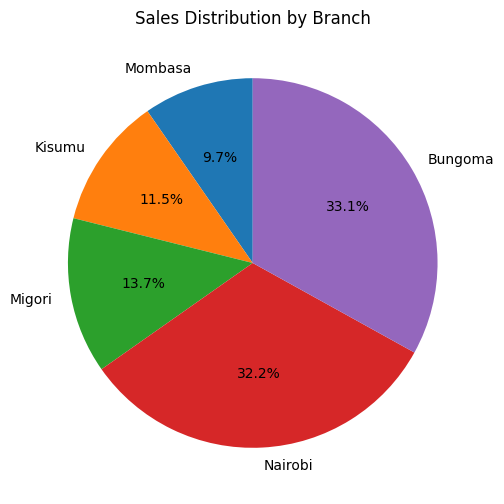

In [11]:
#Sales distribution by Branch Pie Chart

plt.figure(figsize = (6,6))
plt.pie(sales_by_branch['Sales_count'], labels = sales_by_branch['Branch'],autopct='%1.1f%%', startangle =90)
plt.title('Sales Distribution by Branch')
plt.show()

In [12]:
#Sales distribution by make.

data.head()

sales_by_make = data.groupby('make')['model'].count().reset_index()

sales_by_make.columns = ['Make','sales_count']

sales_by_make= sales_by_make.sort_values(by = 'sales_count', ascending =True)

print(sales_by_make.to_string(index=False))

   Make  sales_count
Sonlink          141
  Boxer          814
    TVS         1045


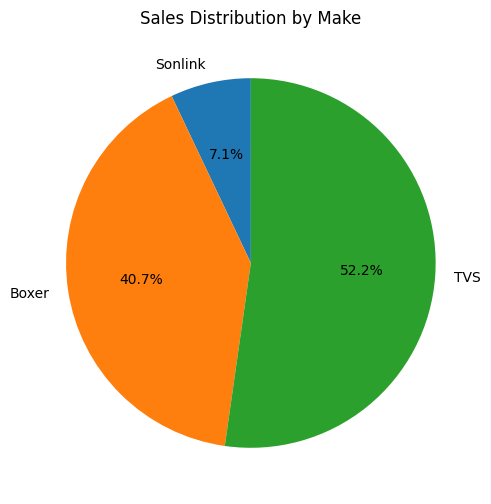

In [13]:
#Sales distribution by Make Pie Chart

plt.figure(figsize=(6,6))
plt.pie(sales_by_make['sales_count'], labels = sales_by_make['Make'], autopct='%1.1f%%', startangle =90)
plt.title('Sales Distribution by Make')
plt.show()

In [14]:
#Sales by month
data.head()

sales_by_month =data.groupby('Month_of_sale')['model'].count().reset_index()
sales_by_month.columns =['month','sales_count']

sales_by_month['month'] = pd.to_datetime(sales_by_month['month'], format = '%B %Y')

sales_by_month= sales_by_month.sort_values (by = 'month', ascending =True)

print(sales_by_month)

       month  sales_count
2 2021-01-01          351
1 2021-02-01          293
4 2021-03-01          271
0 2021-04-01          470
5 2021-05-01          361
3 2021-06-01          254


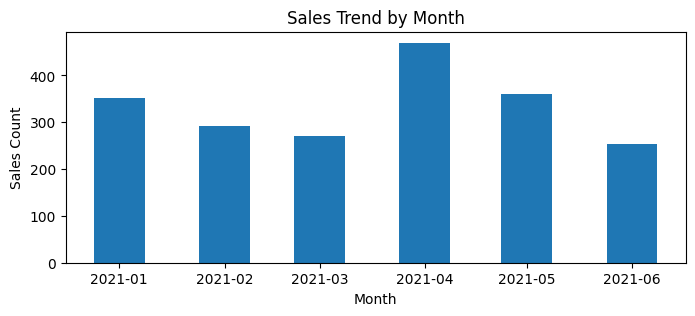

In [15]:
#Plot the line chart to show sales trend by month

plt.figure(figsize =(8,3))
plt.bar(sales_by_month['month'],sales_by_month['sales_count'], width = 15)
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.title('Sales Trend by Month')
plt.show()

In [16]:
#Sales MoM by branch.

#First step is to aggregate by branch and month

data.head()

sales_by_branch_month  = data.groupby(['Month_of_sale','branch'])['model'].count().reset_index()
sales_by_branch_month['Month_of_sale'] = pd.to_datetime(sales_by_branch_month['Month_of_sale'], format = ('%B %Y'))
sales_by_branch_month.columns = ['month','branch','sales_count']
sales_by_branch_month = sales_by_branch_month.sort_values(by = 'month', ascending =True)

sales_by_branch_month.head(10)


,month,branch,sales_count
14,2021-01-01,Nairobi,122
10,2021-01-01,Bungoma,108
11,2021-01-01,Kisumu,52
12,2021-01-01,Migori,27
13,2021-01-01,Mombasa,42
5,2021-02-01,Bungoma,145
6,2021-02-01,Kisumu,30
7,2021-02-01,Migori,25
8,2021-02-01,Mombasa,28
9,2021-02-01,Nairobi,65


In [17]:
# Create a for loop to create a line chart for each

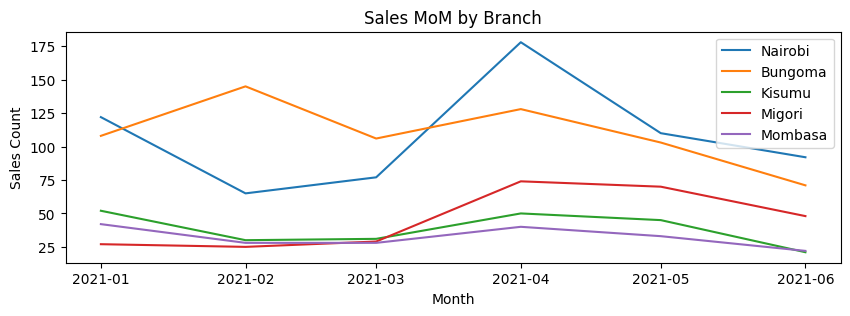

In [18]:
plt.figure(figsize=(10,3))

for branch in sales_by_branch_month['branch'].unique():
  branch_data = sales_by_branch_month[sales_by_branch_month['branch']==branch]
  plt.plot(branch_data['month'],branch_data['sales_count'])


plt.title('Sales MoM by Branch')
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.legend(sales_by_branch_month['branch'].unique())
plt.grid(False)
plt.show()

In [19]:
#MoM sales by make.

#First step is to aggregate by make and month

data.head()
sales_by_make_month = data.groupby(['Month_of_sale','make'])['model'].count().reset_index()
sales_by_make_month.columns = ['month','make','sales_count']
sales_by_make_month['month'] = pd.to_datetime(sales_by_make_month['month'], format = ('%B %Y'))
sales_by_make_month= sales_by_make_month.sort_values(by = 'month', ascending =True)
sales_by_make_month.head(10)

,month,make,sales_count
8,2021-01-01,TVS,145
6,2021-01-01,Boxer,176
7,2021-01-01,Sonlink,30
3,2021-02-01,Boxer,44
4,2021-02-01,Sonlink,23
5,2021-02-01,TVS,226
14,2021-03-01,TVS,169
13,2021-03-01,Sonlink,43
12,2021-03-01,Boxer,59
0,2021-04-01,Boxer,233


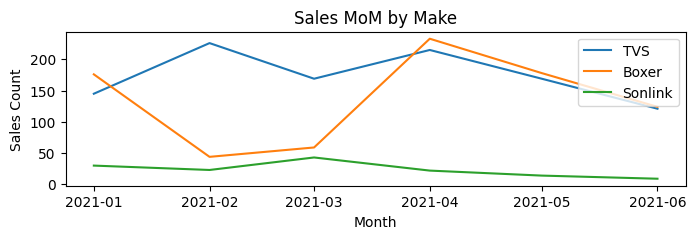

In [20]:
#Iterate through the data to create a line chart
plt.figure(figsize=(8,2))

for make in sales_by_make_month['make'].unique():
  make_data = sales_by_make_month[sales_by_make_month['make']==make]
  plt.plot(make_data['month'], make_data['sales_count'])

plt.title('Sales MoM by Make')
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.legend(sales_by_make_month['make'].unique())
plt.grid(False)
plt.show()

In [21]:
#Total Sales Vs Ontime repayment

#Create a function that aggregates the data to make it possible to do the chart

def manual_aggregations(group):
  total_sales =group['model'].count()
  total_paid_up = (group['is_late_to_pay']==0).sum()
  repayment_rate = round((total_paid_up/total_sales)*100,2)

  return pd.Series(
      {
          'total_sales':total_sales,
          'total_paid_up':total_paid_up,
          'repayment_rate':repayment_rate
      }
  )

agg_data = data.groupby('Month_of_sale').apply(manual_aggregations).reset_index()

agg_data['Month_of_sale'] = pd.to_datetime(agg_data['Month_of_sale'], format = ('%B %Y'))

agg_data = agg_data.sort_values(by = 'Month_of_sale', ascending =True)

agg_data



,Month_of_sale,total_sales,total_paid_up,repayment_rate
2,2021-01-01,351.0,305.0,86.89
1,2021-02-01,293.0,266.0,90.78
4,2021-03-01,271.0,249.0,91.88
0,2021-04-01,470.0,407.0,86.60
5,2021-05-01,361.0,316.0,87.53
3,2021-06-01,254.0,235.0,92.52


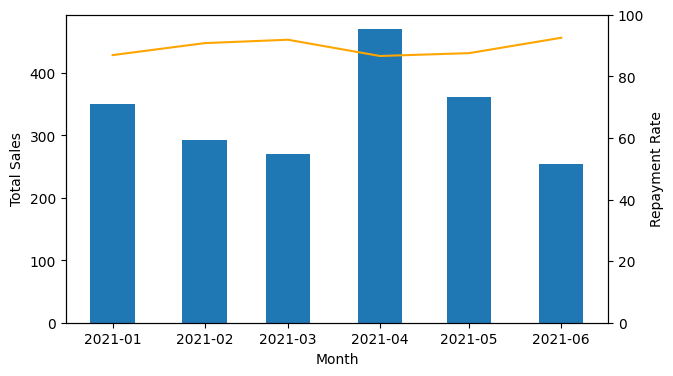

In [22]:
#plot the chart

fig, ax1= plt.subplots(figsize=(7,4))

ax1.bar(agg_data['Month_of_sale'],agg_data['total_sales'], width =15)
ax1.set_ylabel('Total Sales')
ax1.set_xlabel('Month')

ax2 =ax1.twinx()

ax2.plot(agg_data['Month_of_sale'],agg_data['repayment_rate'], color = 'orange')
ax2.set_ylabel('Repayment Rate')
ax2.set_ylim(0,100)

plt.show()


In [23]:
# Repayment-only Trends

#Overall On-time repayment

#Define function to use to generate on-time repayment data

def overall_repayment(group):
  total_sales = group['model'].count()
  paid_ontime = (group['is_late_to_pay']==0).sum()
  ontime_rate = round(paid_ontime/total_sales*100,2)

  return pd.Series(
      {
          'total_sales':total_sales,
          'paid_ontime':paid_ontime,
          'ontime_rate':ontime_rate

      }
  )

repayment_data = data.groupby('Month_of_sale').apply(overall_repayment).reset_index()
repayment_data['Month_of_sale'] = pd.to_datetime(repayment_data['Month_of_sale'])
repayment_data = repayment_data.sort_values(by = 'Month_of_sale', ascending =True)

repayment_data.head()

<ipython-input-23-4558f47e3dc7>:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  repayment_data['Month_of_sale'] = pd.to_datetime(repayment_data['Month_of_sale'])


,Month_of_sale,total_sales,paid_ontime,ontime_rate
2,2021-01-01,351.0,305.0,86.89
1,2021-02-01,293.0,266.0,90.78
4,2021-03-01,271.0,249.0,91.88
0,2021-04-01,470.0,407.0,86.60
5,2021-05-01,361.0,316.0,87.53


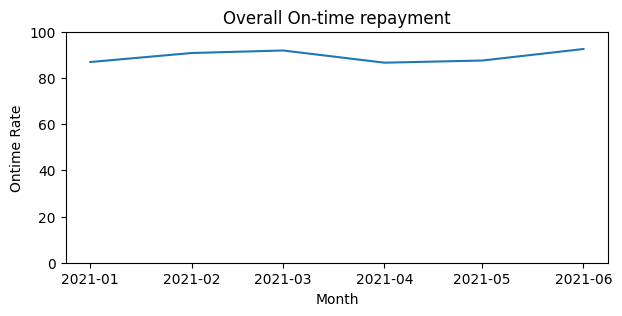

In [24]:
#Plot ontime-repayment chart
plt.figure(figsize=(7,3))
plt.plot(repayment_data['Month_of_sale'], repayment_data['ontime_rate'])
plt.ylim(0,100)
plt.ylabel('Ontime Rate')
plt.xlabel('Month')
plt.title('Overall On-time repayment')
plt.show()